# Part 2: Machine Learning

## Section 1: Regression Section (Questions 1 - 20)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set()

#### For this section please follow the steps below before attempting the questions.

- **Load the data set titled ‘rand-dollar.csv’**
- **Seperate the dataset into X (features) and y (targets)**
- **Create an 80/20 split between train and test sets**
- **The training data should be the first 80% of the data, with the final 20% being used in the test set**
- **Train a simple linear regression model to predict the ‘ZAR/USD’ using only ‘Value of Exports (ZAR)’ as the predictor variable**

In [2]:
# Load Dataset
df = pd.read_csv("rand-dollar.csv", index_col=0)

df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Savings Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,1.92,29526.78,51547.61,37752.29,4.53,14.5,8.36,312.97,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,2.01,29943.04,59702.31,45927.67,5.61,14.5,8.69,335.09,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,2.05,30246.54,56448.18,42565.17,5.62,14.5,9.16,348.84,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,2.03,30399.21,55534.75,43342.70,5.80,15.0,9.15,358.47,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,2.10,30467.81,57682.89,46533.13,6.50,15.0,9.51,371.98,88.32


In [3]:
df.index

Index(['2008M01', '2008M02', '2008M03', '2008M04', '2008M05', '2008M06',
       '2008M07', '2008M08', '2008M09', '2008M10',
       ...
       '2017M03', '2017M04', '2017M05', '2017M06', '2017M07', '2017M08',
       '2017M09', '2017M10', '2017M11', '2017M12'],
      dtype='object', length=120)

In [4]:
df.loc["2017M08"]

ZAR/USD                                        13.23
Value of Exports (USD)                       7799.19
Value of Exports (ZAR)                     103199.17
Value of Imports (USD)                       7724.11
Value of Imports (ZAR)                     102205.79
IMF Reserve Position (USD)                    661.54
Foreign Exchange (USD)                      38889.00
Claims on Non-residents (USD)               43768.32
Liabilities to Non-residents (USD)          33965.83
Savings Rate                                    4.36
Lending Rate                                   10.25
Government Bonds                                9.12
Financial Market Prices, Equities Index       167.16
Consumer Price Index                          146.40
Name: 2017M08, dtype: float64

In [5]:
print(f"df_shape = {df.shape}")

df_shape = (120, 14)


In [6]:
# Separate the data set into X (features) and y (targets)

features = ["Value of Exports (ZAR)"]
target = "ZAR/USD"
#Feature Metrix
X = df[features]
# Target Vector
y = df[target]

print(X.shape, y.shape)

(120, 1) (120,)


In [7]:
# Split train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

y_train.shape

(96,)

In [8]:
# Instantiate LinearRegression model
lm = LinearRegression()

# Fit train datasets
lm.fit(X_train, y_train)


LinearRegression()

### Question 1

**What is the value of the intercept of the model?**

*3.29*

In [9]:
lm.intercept_

3.2941036551619076

### Question 2
**How do we interpret the intercept?**

*The value of ZAR/USD will be equal to this value when exports are zero*

### Question 3

**What is the value of the slope of this model?**

*8.68e-5*

In [10]:
slope = lm.coef_[0]

slope

8.677126339792253e-05

### Question 4

**How do we interpret the slope of the model?**

*An increase of 1 unit in exports results in an increase of this many units in ZAR/USD*

### Question 5

**What is the predicted value of the exchange rate in a month where exports total R100 000?**

*R11.97 / $1.00*

In [11]:
e = np.array([[100000]])
p = lm.predict(e)

p[0]

C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


11.971229994954161

### Question 6

**What is the MSE of the model on the test set?**

*8.22*

In [12]:
# Predict the values for the test set
y_pred = lm.predict(X_test)

# Calculate the MSE
mse = mean_squared_error(y_test, y_pred)

mse

8.221852113297055

### Question 7

**What is the R-squared value of the model on the test set?**

*-8.45*

In [13]:
r_squared = r2_score(y_test, y_pred)

r_squared

-8.448868004702904

### Question 8

**What would a negative R-squared test value imply?**

*The model is worse at predicting the target variable than if a constant line y = intercept was used*

### Question 9

**What is the predicted value for August 2017?**

*R12.25 / $1.00*

In [14]:
august = np.array([[df.loc["2017M08"][2]]])

x = lm.predict(august)

x[0]

C:\Users\ikenna\AppData\Local\Temp\ipykernel_12844\722983689.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  august = np.array([[df.loc["2017M08"][2]]])
C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


12.248826017678894

### Question 10

**What is the absolute error for this prediction?**

*R0.98*

In [15]:
value = np.array([[df.loc["2017M08"][0]]])
value

C:\Users\ikenna\AppData\Local\Temp\ipykernel_12844\1382828214.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = np.array([[df.loc["2017M08"][0]]])


array([[13.23]])

In [16]:
mae = mean_absolute_error(value, x)

mae

0.9811739823211063

### Question 11

Now revert back to using the full original data set.

Use the df.corr() function to find the correlations between the predictors and the target variable.

**Which variable has the weakest linear relationship with the ZAR/USD exchange rate?**

*Savings Rate*

In [17]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix
# print(correlation_matrix)

# Extract the correlation values for ZAR/USD
zar_usd_corr = correlation_matrix['ZAR/USD']

# Find the variable with the weakest correlation with ZAR/USD
weakest_corr_variable = zar_usd_corr.abs().idxmin()

print(f"The variable with the weakest linear relationship with the ZAR/USD exchange rate is: {weakest_corr_variable}")


The variable with the weakest linear relationship with the ZAR/USD exchange rate is: Savings Rate


### Question 12

**Which variable has the strongest linear relationship with the ZAR/USD exchange rate?**

*Consumer Price Index*

In [18]:
# Extract the correlation values for ZAR/USD and drop ZAR/USD itself
zar_usd_corr = correlation_matrix['ZAR/USD'].drop('ZAR/USD')

# Find the variable with the strongest correlation with ZAR/USD
strongest_corr_variable = zar_usd_corr.abs().idxmax()

print(f"The variable with the strongest linear relationship with the ZAR/USD exchange rate is: {strongest_corr_variable}")


The variable with the strongest linear relationship with the ZAR/USD exchange rate is: Consumer Price Index


In [19]:
zar_usd_corr 

Value of Exports (USD)                    -0.335780
Value of Exports (ZAR)                     0.784756
Value of Imports (USD)                    -0.350606
Value of Imports (ZAR)                     0.791994
IMF Reserve Position (USD)                 0.855311
Foreign Exchange (USD)                     0.317203
Claims on Non-residents (USD)             -0.727278
Liabilities to Non-residents (USD)        -0.472230
Savings Rate                               0.041555
Lending Rate                              -0.056806
Government Bonds                           0.191455
Financial Market Prices, Equities Index    0.139858
Consumer Price Index                       0.872660
Name: ZAR/USD, dtype: float64

### Question 13

Before answering the following questions, make sure to perform the steps outlined below:

- Split the original DataFrame into X (features) and y (targets)
- Standardise the entire X matrix
- Create X_train, X_test, y_train, y_test using the same chronological 80/20 split as before
- Train two models, “ridge” and “lasso”, which use ridge regression and LASSO, respectively (in the case of the lasso model, set alpha=0.01, use default parameters for the ridge model)


**What is the training MSE of the Ridge model?**

*0.040*

In [20]:
# Split the original DataFrame into X (features) and y (target)
X = df.drop(columns=['ZAR/USD'])
y = df['ZAR/USD']

# Standardize the entire X matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create X_train, X_test, y_train, y_test using the same chronological 80/20 split as before
# Assuming the data is sorted chronologically
'''split_index = int(len(X) * 0.8)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]'''
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)


# Train Ridge and LASSO models
ridge = Ridge()
lasso = Lasso(alpha=0.01)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

# Calculate the training MSE of the Ridge model
y_train_pred_ridge = ridge.predict(X_train)
mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)

print(f"Training MSE of the Ridge model: {mse_ridge_train}")


Training MSE of the Ridge model: 0.04023298827614489


### Question 14

**What is the training MSE of the LASSO model?**

*0.047*

In [21]:
# Calculate the training MSE of the LASSO model
y_train_pred_lasso = lasso.predict(X_train)
mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)

print(f"Training MSE of the LASSO model: {mse_lasso_train}")

Training MSE of the LASSO model: 0.046954939218206614


### Question 15

**What is the testing MSE of the Ridge model?**

*0.632*

In [22]:
# Testing MSE of Ridge Model
mse_ridge_test = mean_squared_error(y_test, ridge.predict(X_test))

print(f"Testing MSE of the Ridge model: {mse_ridge_test}")

Testing MSE of the Ridge model: 0.6323866944567409


### Question 16

**What is the testing MSE of the LASSO model?**

*0.579*

In [23]:
# Testing MSE of Lasso Model
mse_lasso_test = mean_squared_error(y_test, lasso.predict(X_test))

print(f"Testing MSE of the Ridge model: {mse_lasso_test}")

Testing MSE of the Ridge model: 0.5790226574339913


### Question 17

**Based on the values of the Ridge model’s variable coefficients, which indicator is the best predictor of the target variable?**

- Liabilities to Non-residents (USD)
- **Value of Exports (ZAR)**
- Government Bonds
- Value of Imports (ZAR)

In [24]:
# Get the coefficients of the Ridge model
coefficients = ridge.coef_

# Map coefficients to feature names
features = X.columns
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Find the feature with the highest absolute coefficient
best_predictor = coefficients_df.loc[coefficients_df['Coefficient'].abs().idxmax()]

print(f"The best predictor of the target variable is: {best_predictor['Feature']}")

The best predictor of the target variable is: Value of Exports (ZAR)


In [25]:
coefficients_df

,Feature,Coefficient
0,Value of Exports (USD),-0.578656
1,Value of Exports (ZAR),1.061183
2,Value of Imports (USD),-0.736367
3,Value of Imports (ZAR),1.002528
4,IMF Reserve Position (USD),0.020487
5,Foreign Exchange (USD),0.155625
6,Claims on Non-residents (USD),0.068125
7,Liabilities to Non-residents (USD),0.005712
8,Savings Rate,-0.087518
9,Lending Rate,0.525606


### Question 18

**Based on the values of the Ridge model’s variable coefficients, which indicator is the worst predictor of the target variable?**

- Value of Imports (ZAR)
- **Liabilities to Non-residents (USD)**
- Value of Exports (ZAR)
- Government Bonds

In [26]:
# Find the feature with the lowest absolute coefficient
worst_predictor = coefficients_df.loc[coefficients_df['Coefficient'].abs().idxmin()]

print(f"The worst predictor of the target variable is: {worst_predictor['Feature']}")

The worst predictor of the target variable is: Liabilities to Non-residents (USD)


### Question 19

**Based on the values of the LASSO model’s variable coefficients, which indicator is the best predictor of the target variable?**

- **Value of Imports (ZAR)**
- Value of Exports (ZAR)
- Liabilities to Non-residents (USD)
- Government Bonds

In [27]:
# Get the coefficients of the Lasso model
coefficients = lasso.coef_

# Map coefficients to feature names
features = X.columns
coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

# Find the feature with the highest absolute coefficient
best_predictor = coefficients_df.loc[coefficients_df['Coefficient'].abs().idxmax()]

print(f"The best predictor of the target variable is: {best_predictor['Feature']}")

The best predictor of the target variable is: Value of Imports (ZAR)


In [28]:
coefficients_df

,Feature,Coefficient
0,Value of Exports (USD),-0.577647
1,Value of Exports (ZAR),1.135450
2,Value of Imports (USD),-0.816718
3,Value of Imports (ZAR),1.171819
4,IMF Reserve Position (USD),0.000000
5,Foreign Exchange (USD),0.080232
6,Claims on Non-residents (USD),0.000000
7,Liabilities to Non-residents (USD),0.030399
8,Savings Rate,0.000000
9,Lending Rate,0.209855


### Question 20

**How many variables have coefficients equal to zero in the LASSO model?**

*4*

In [29]:
# Count the number of zero coefficients
num_zero_coefficients = (coefficients == 0).sum()

print(f"The number of variables with coefficients equal to zero in the LASSO model is: {num_zero_coefficients}")

The number of variables with coefficients equal to zero in the LASSO model is: 4


## Section 2: Classification (Questions 21 - 41)

- The next 10 questions (Question 21 - 30) are based on the medical claims dataset (`claims_data.csv`)

In [30]:
# Load the dataset
claims_data = pd.read_csv('claims_data.csv')

claims_data.head()

,age,sex,bmi,steps,children,smoker,region,insurance_claim,claim_amount
0,19,female,27.900,3009,0,yes,southwest,yes,16884.9240
1,18,male,33.770,3008,1,no,southeast,yes,1725.5523
2,28,male,33.000,3009,3,no,southeast,no,0.0000
3,33,male,22.705,10009,0,no,northwest,no,0.0000
4,32,male,28.880,8010,0,no,northwest,yes,3866.8552


### Question 21 

**What proportion of individuals in this dataset would be classified as overweight or obese (BMI of greater than 25)?**

*82%*

In [31]:
# Filter individuals with BMI greater than 25
overweight_obese = claims_data[claims_data['bmi'] > 25]

# Calculate the proportion
proportion_overweight_obese = round(len(overweight_obese) / len(claims_data) * 100)

print(f"The proportion of individuals classified as overweight or obese is: {proportion_overweight_obese}%")

The proportion of individuals classified as overweight or obese is: 82%


### Question 22

**Is the Poisson distribution a good choice to model the distribution of the number of children in this dataset?**

- **No, the variance is significantly higher than the mean, suggesting overdispersion relative to the Poisson distribution.**
- No, the variance is significantly lower than the mean, suggesting underdispersion relative to the Poisson distribution.
- No, the Poisson is inappropriate, as it is a continuous distribution while the number of children is a discrete variable.
- No, because the Poisson only applies to positive integers, so cannot accommodate observations with 0 children.
- Yes, the Poisson is a good choice for count data such as the number of children in a family.

In [32]:
# Calculate the mean and variance of the 'number_of_children' column
mean_children = claims_data['children'].mean()
variance_children = claims_data['children'].var()

# Print the results
print(f"Mean number of children: {mean_children}")
print(f"Variance of number of children: {variance_children}")

Mean number of children: 1.0949177877429
Variance of number of children: 1.4532127456668944


In [33]:
# Determine if the Poisson distribution is appropriate
if variance_children > mean_children:
    print("No, the variance is significantly higher than the mean, suggesting overdispersion relative to the Poisson distribution.")
elif variance_children < mean_children:
    print("No, the variance is significantly lower than the mean, suggesting underdispersion relative to the Poisson distribution.")
else:
    print("Yes, the Poisson is a good choice for count data such as the number of children in a family.")

No, the variance is significantly higher than the mean, suggesting overdispersion relative to the Poisson distribution.


### Question 23

**If we assumed that age of this group was normally distributed, then given the mean and standard deviation of age in the data set, calculate the number of individuals we would expect to be aged 60 or older.**

- Use 60 exactly as the cutoff point on the distribution, and round to the nearest integer.
- Then compare this with the number actually aged 60 or older.

Which of the following is true?

- There are 7 fewer individuals 60 or older than the normal distribution would suggest.
- There are 7 more individuals 60 or older than the normal distribution would suggest.
- There are 21 fewer individuals 60 or older than the normal distribution would suggest.
- The two are exactly equal!
- **There are 21 more individuals 60 or older than the normal distribution would suggest.**

In [34]:
import scipy.stats as stats

# Calculate the mean and standard deviation of age
mean_age = claims_data['age'].mean()
std_age = claims_data['age'].std()

# Calculate the Z-score for age 60
z_score_60 = (60 - mean_age) / std_age

# Calculate the proportion of individuals aged 60 or older using the cumulative distribution function (CDF)
proportion_60_or_older = 1 - stats.norm.cdf(z_score_60)

# Calculate the expected number of individuals aged 60 or older
expected_60_or_older = round(proportion_60_or_older * len(claims_data))

# Calculate the actual number of individuals aged 60 or older in the dataset
actual_60_or_older = len(claims_data[claims_data['age'] >= 60])

# Compare the expected and actual numbers
difference = actual_60_or_older - expected_60_or_older

# Print the results
print(f"Mean age: {mean_age}")
print(f"Standard deviation of age: {std_age}")
print(f"Expected number of individuals aged 60 or older: {expected_60_or_older}")
print(f"Actual number of individuals aged 60 or older: {actual_60_or_older}")
print(f"Difference: {difference}")

Mean age: 39.20702541106129
Standard deviation of age: 14.049960379216172
Expected number of individuals aged 60 or older: 93
Actual number of individuals aged 60 or older: 114
Difference: 21


In [35]:
# Determine which of the given statements is true
if difference == -7:
    print("There are 7 fewer individuals 60 or older than the normal distribution would suggest.")
elif difference == 7:
    print("There are 7 more individuals 60 or older than the normal distribution would suggest.")
elif difference == -21:
    print("There are 21 fewer individuals 60 or older than the normal distribution would suggest.")
elif difference == 0:
    print("The two are exactly equal!")
elif difference == 21:
    print("There are 21 more individuals 60 or older than the normal distribution would suggest.")
else:
    print(f"The difference of {difference} does not match any of the given options.")

There are 21 more individuals 60 or older than the normal distribution would suggest.


### Question 24

**Create a joint plot on the age and BMI variables. What summarises best what you see?**

- There is a clearly discernible pattern in the plot, with a tight clustering and upward trend showing that older people tend to have higher BMIs, confirmed by a correlation coefficient of 0.11 which is statistically significantly different from zero.
- There is not an easily discernible pattern in the plot, but the correlation coefficient is 0.11, which is statistically significantly different from zero, suggesting that older people tend to have lower BMIs.
- There is a clearly discernible pattern in the plot, with a tight clustering and downward trend showing that older people tend to have lower BMIs, confirmed by a correlation coefficient of 0.11, which is statistically significantly different from zero.
- **There is not an easily discernible pattern in the plot, but the correlation coefficient is 0.11, which is statistically significantly different from zero, suggesting that older people tend to have higher BMIs.**
- There is not an easily discernible pattern in the plot, and the correlation coefficient is 0.11, which is not statistically significantly different from zero.

C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ikenna\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


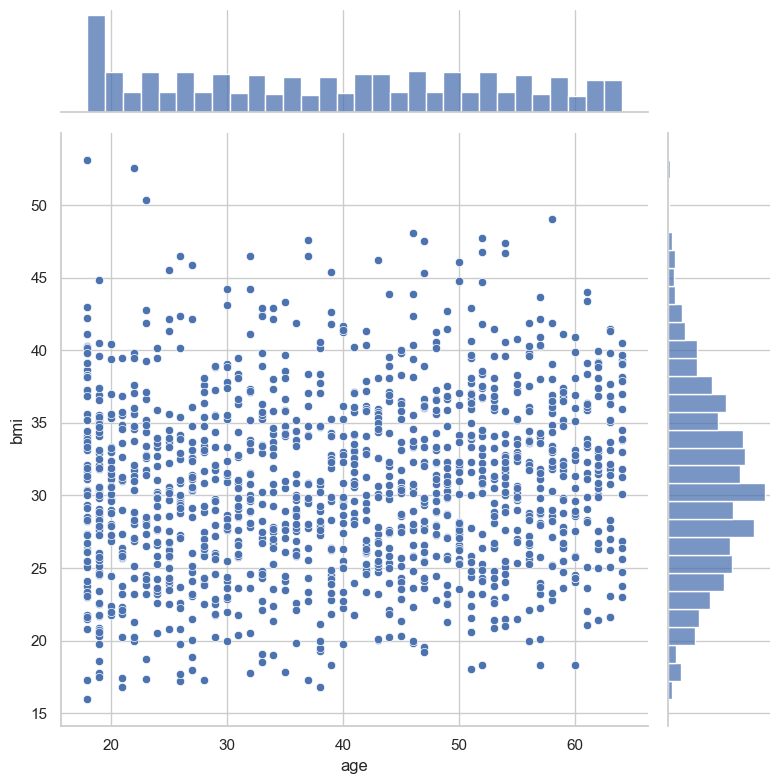

In [36]:
# Create a joint plot for age and BMI
sns.set(style="whitegrid")
joint_plot = sns.jointplot(data=claims_data, x='age', y='bmi', kind='scatter', height=8, ratio=5, marginal_kws=dict(bins=30, fill=True))

# Show the plot
plt.show()

In [37]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(claims_data['age'], claims_data['bmi'])

print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")


Correlation coefficient: 0.10927188154853518
P-value: 6.194289065049164e-05


### Question 25

- Use the appropriate model from the sklearn library (with default parameters unless specified otherwise) to fit a logistic regression model to the data, with insurance_claim as your target variable, using all other fields apart from claim_amount and creating dummy variables for the categorical variables in the data, dropping the first in each instance.
- Do a test-train split holding out 33% of the data for the test set, using a random seed of 42 for the split.
- Convert your target variable to a binary 0 or 1, where 1 indicates that there was a claim.
  
**What proportion of claim indicators in the test set are correctly predicted?**

*87%*

In [38]:
# Convert target variable 'insurance_claim' to binary 0 or 1
claims_data['insurance_claim'] = claims_data['insurance_claim'].apply(lambda x: 1 if x == "yes" else 0)

# Drop 'claim_amount' from the dataset
claims_data = claims_data.drop(columns=['claim_amount'])

# Create dummy variables for categorical variables, dropping the first in each instance
claims_data = pd.get_dummies(claims_data, drop_first=True)

# Define features and target
X = claims_data.drop(columns=['insurance_claim'])
y = claims_data['insurance_claim']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Initialize and train the logistic regression model with increased max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

accuracy = round(accuracy * 100)

print(f"Proportion of claim indicators in the test set correctly predicted: {accuracy}%")

Proportion of claim indicators in the test set correctly predicted: 87%


### Question 26

Now fit another logistic regression, this time using the statsmodels library to do so, with default parameters.

Be sure to add a constant to your X matrices, both train and test (you might want to check the statsmodels documentation for the add_constant function).

**Which of the following best summarises the results?**

**Age, sex, BMI, number of children and smoker status significantly affect the likelihood of an insurance claim. Number of steps is not significant. There appear to be some regional effects, but these are not strongly significant.**

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

# Load the dataset
claims_data = pd.read_csv('claims_data.csv')

# Convert target variable 'insurance_claim' to binary 0 or 1
claims_data['insurance_claim'] = claims_data['insurance_claim'].apply(lambda x: 1 if x == "yes" else 0)

# Drop 'claim_amount' from the dataset
claims_data = claims_data.drop(columns=['claim_amount'])

# Create dummy variables for categorical variables, dropping the first in each instance
claims_data = pd.get_dummies(claims_data, drop_first=True)

# Define features and target
X = claims_data.drop(columns=['insurance_claim'])
y = claims_data['insurance_claim']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame to keep the column names
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.33, random_state=42)

# Add a constant to the X matrices
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the summary of the model
print(result.summary())

# Make predictions on the test set
y_pred_prob = result.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Proportion of claim indicators in the test set correctly predicted: {accuracy}")


Optimization terminated successfully.
         Current function value: 0.368829
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        insurance_claim   No. Observations:                  896
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            9
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                  0.4572
Time:                        16:23:26   Log-Likelihood:                -330.47
converged:                       True   LL-Null:                       -608.78
Covariance Type:            nonrobust   LLR p-value:                4.241e-114
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.8149      0.114      7.133      0.000       0.591       1.039
age        

### Question 27

**What is the primary reason for using random forests instead of a single decision tree?**

- **Decision trees suffer from high variance, and random forests reduce this variance by averaging multiple trees, each fitted to a subset of the observations and ensuring these trees are decorrelated by using only a subset of the available predictors.**
- Decision trees suffer from high variance, and random forests reduce this variance by averaging multiple trees, each fitted to a subset of the observations.
- There is much more firewood in a whole forest than in a single tree.
- There is no good reason in principle to prefer a random forest over a single decision tree; it depends on the data.
- Decision trees suffer from high bias, and random forests reduce this, but at the expense of higher variance.

### Question 28

**Now fit a random forest with 100 trees and a random seed of 101, and default parameters for the rest.**

Which of the following sets out the number of false negatives and false positives in the confusion matrix on the test data?

- FN = 12, FP = 12
- FN = 177, FP = 245
- FN = 245, FP = 177
- **FN = 8, FP = 5**
- FN = 5, FP = 8

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

data = pd.read_csv('claims_data.csv').dropna()

# Convert target variable 'insurance_claim' to binary 0 or 1
data['insurance_claim'] = data['insurance_claim'].apply(lambda x: 1 if x == "yes" else 0)


# Separate features and target variable
X = data.drop(['insurance_claim', 'claim_amount'], axis=1)
y = data['insurance_claim']

# Encode the data
X_dummy = pd.get_dummies(X,drop_first=True)

labeler = LabelEncoder()
y_encoded = labeler.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y_encoded, test_size=0.33, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=101)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

confusion_matrix

array([[176,   5],
       [  8, 253]], dtype=int64)

In [52]:
help(confusion_matrix)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

### Question 29

**Fit Support Vector Machine models to the training data, using respectively the radial, sigmoid and linear kernels with default parameters.**

**Which model yields the best accuracy on test data?**

*Linear*

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
df = pd.read_csv('claims_data.csv')

# Convert target variable 'insurance_claim' to binary 0 or 1
df['insurance_claim'] = df['insurance_claim'].apply(lambda x: 1 if x == "yes" else 0)

# Encode categorical variables using get_dummies
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop(columns=['insurance_claim'])
y = df_encoded['insurance_claim']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101)

# Define SVM models with different kernels
svm_radial = SVC(kernel='rbf', random_state=101)
svm_sigmoid = SVC(kernel='sigmoid', random_state=101)
svm_linear = SVC(kernel='linear', random_state=101)

# Train the models
svm_radial.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)
svm_linear.fit(X_train, y_train)

# Make predictions on the test data
y_pred_radial = svm_radial.predict(X_test)
y_pred_sigmoid = svm_sigmoid.predict(X_test)
y_pred_linear = svm_linear.predict(X_test)

# Calculate the accuracy for each model
accuracy_radial = accuracy_score(y_test, y_pred_radial)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("Accuracy with Radial Kernel:", accuracy_radial)
print("Accuracy with Sigmoid Kernel:", accuracy_sigmoid)
print("Accuracy with Linear Kernel:", accuracy_linear)

# Determine which model yields the best accuracy
best_kernel = max([(accuracy_radial, 'Radial'), (accuracy_sigmoid, 'Sigmoid'), (accuracy_linear, 'Linear')])
print(f"The best accuracy is obtained with the {best_kernel[1]} kernel: {best_kernel[0]}")


Accuracy with Radial Kernel: 0.9850746268656716
Accuracy with Sigmoid Kernel: 0.8805970149253731
Accuracy with Linear Kernel: 0.9888059701492538
The best accuracy is obtained with the Linear kernel: 0.9888059701492538


### Question 30

**With respect to a SVM, which of the following is true?**

- **Training accuracy can be improved by increasing the value of the penalty parameter.**
- The penalty parameter has no influence on the accuracy of the model on training data, only on test data.
- The penalty parameter cannot be varied using sklearn.
- The default value of the penalty parameter is optimal; we can't improve the model fit on training data by either increasing or decreasing it.
- Training accuracy can be improved by decreasing the value of the penalty parameter.

The next 4 questions (Questions 31 - 34) are based on the IPL match data (matches.xlsx).


In [42]:
match = pd.read_excel("matches.xlsx")

match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

### Question 31

The indicator dl_applied refers to weather-shortened matches in which the Duckworth-Lewis method was applied to determine the winner.

**In what proportion of matches did this happen?**

*2.5%*

In [44]:
match['dl_applied'].unique()

array([0, 1], dtype=int64)

In [45]:
# Count the total number of matches
total_matches = match.shape[0]

# Count the number of matches where Duckworth-Lewis method was applied
dl_matches = match[match['dl_applied'] == 1].shape[0]

# Calculate the proportion
dl_proportion = (dl_matches / total_matches) * 100

print(f"The proportion of matches where the Duckworth-Lewis method was applied is {dl_proportion:.2f}%")


The proportion of matches where the Duckworth-Lewis method was applied is 2.52%


In [46]:
proportion = (len(match[match['dl_applied'] == 1])/ len(match))*100

round(proportion, 2)

2.52

### Question 32

**What proportion of matches was won by the team who batted first?**

In [47]:
# Count the total number of matches
total_matches = match.shape[0]

# Count the number of matches where the team who batted first won
batted_first_wins = match[match['win_by_runs'] > 0].shape[0]

# Calculate the proportion
batted_first_proportion = (batted_first_wins / total_matches) * 100

print(f"The proportion of matches won by the team who batted first is {batted_first_proportion:.2f}%")


The proportion of matches won by the team who batted first is 45.13%


### Question 33

We define a close match as one which was won by 20 runs or less, or by 4 wickets or less.

We want to build a model to predict whether or not a game will be close based on the following three features:

- whether the match was played in the month of April, or not
- whether the toss winners chose to bat or field
- whether or not the Duckworth-Lewis method was applied

Create these features. 

**Which of the following tuples correctly enumerates respectively the number of April games and choices to field first across the data set?**

In [48]:

# Create the 'is_april' feature
match['is_april'] = match['date'].apply(lambda x: pd.to_datetime(x).month == 4)

# Create the 'chose_to_field' feature
match['chose_to_field'] = match['toss_decision'] == 'field'

# The 'dl_applied' feature is already present as 'dl_applied'

# Count the number of April games
april_games_count = match['is_april'].sum()

# Count the number of choices to field first
field_first_count = match['chose_to_field'].sum()

print(f"Number of April games: {april_games_count}")
print(f"Number of choices to field first: {field_first_count}")
april_games_count, field_first_count

Number of April games: 297
Number of choices to field first: 363


(297, 363)

### Question 34

Build a decision tree classifier on these features, using a train-test split with a 75:25 weight and a random seed of 999.

**Which of the following is the most accurate reflection of the confusion matrix on the test data?**

- The model predicts that the vast majority of games will be close wins. Hence we have few false negatives but many false positives.
- The model does a reasonably good job of predicting close wins, with relatively few false positives and false negatives.
- The model predicts that the vast majority of games will be close wins. Hence we have few false positives but many false negatives.
- **The model predicts that the vast majority of games will not be close wins. Hence we have few false positives but many false negatives.**
- The model predicts that the vast majority of games will not be close wins. Hence we have few false negatives but many false positives.


In [49]:
# Define the target variable 'is_close_match'
match['is_close_match'] = ((match['win_by_runs'] <= 20) & (match['win_by_runs'] > 0)) | ((match['win_by_wickets'] <= 4) & (match['win_by_wickets'] > 0))

# Select features and target
X = match[['is_april', 'chose_to_field', 'dl_applied']]
y = match['is_close_match']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=999)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=999)
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[107   2]
 [ 49   1]]


The next 4 questions (Questions 35 - 38) are based on the FIFA players dataset (football_players.csv).

In [50]:
players = pd.read_csv("football_players.csv", encoding = "latin-1")
players.head()

,Name,Age,Nationality,Overall,Acceleration,Aggression,Agility,Balance,Ball control,Composure,...,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,Preferred Positions,Preferred Positions Type
0,Cristiano Ronaldo,32,Portugal,94.0,89.0,63.0,89.0,63.0,93.0,95.0,...,94.0,23.0,91.0,92.0,31.0,80.0,85.0,88.0,ST LW,Forward
1,L. Messi,30,Argentina,93.0,92.0,48.0,90.0,95.0,95.0,96.0,...,85.0,26.0,87.0,73.0,28.0,59.0,90.0,85.0,RW,Forward
2,Neymar,25,Brazil,92.0,94.0,56.0,96.0,82.0,95.0,92.0,...,80.0,33.0,90.0,78.0,24.0,53.0,80.0,83.0,LW,Forward
3,L. Suárez,30,Uruguay,92.0,88.0,78.0,86.0,60.0,91.0,83.0,...,87.0,38.0,77.0,89.0,45.0,80.0,84.0,88.0,ST,Forward
4,M. Neuer,31,Germany,92.0,58.0,29.0,52.0,35.0,48.0,70.0,...,25.0,11.0,61.0,44.0,10.0,83.0,70.0,11.0,GK,GoalKeeper


### Question 35

**What is the most common Overall score for players in the database?**

**66**

In [51]:
most_common_overall = players['Overall'].mode()[0]

print(f"The most common overall score for players is: {most_common_overall}")

The most common overall score for players is: 66.0


In [52]:
players['Overall'].value_counts(ascending = False).nlargest(1)

Overall
66.0    1105
Name: count, dtype: int64

Construct a dataset that is a subset of players who can play in central defence (i.e. who have 'CB' somewhere in their Preferred Positions field).

Split this group into three:

- World Class: overall score of 80 or more
- Good: overall score of 70-79
- Mediocre: overall score below 70
- 
Now build a random forest classifier with default parameters apart from setting to 500 trees and setting the random seed to 1971, on ALL of the data for these central defenders, where the target variable is the classification into one of the three classes defined above, and the candidate features are all other numerical variables.

### Question 36

**In descending order, which are the five most important features that emerge from this model?**

**Standing tackle, Marking, Interceptions, Sliding Tackle, Reactions**

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Create the subset of players who can play in central defense
central_defenders = players[players['Preferred Positions'].str.contains('CB')]

# Classify the central defenders
def classify_overall(row):
    if row['Overall'] >= 80:
        return 'World Class'
    elif row['Overall'] >= 70:
        return 'Good'
    else:
        return 'Mediocre'

central_defenders['Class'] = central_defenders.apply(classify_overall, axis=1)

# Encode the target variable
le = LabelEncoder()
central_defenders['Class'] = le.fit_transform(central_defenders['Class'])

# Select features (all numerical columns except 'overall')
features = central_defenders.select_dtypes(include=['number']).drop(columns=['Overall', 'Class'])

# Define the target variable
target = central_defenders['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1971)

# Build the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=500, random_state=1971)
rf_classifier.fit(X_train, y_train)

# Get the feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 5 most important features
top_5_features = feature_importances.head(6)
print(top_5_features)


C:\Users\ikenna\AppData\Local\Temp\ipykernel_10356\3837243481.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_defenders['Class'] = central_defenders.apply(classify_overall, axis=1)
C:\Users\ikenna\AppData\Local\Temp\ipykernel_10356\3837243481.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_defenders['Class'] = le.fit_transform(central_defenders['Class'])


             Feature  Importance
31   Standing tackle    0.171992
22           Marking    0.131898
18     Interceptions    0.123995
28    Sliding tackle    0.096025
17  Heading accuracy    0.072676
25         Reactions    0.072291


### Question 37

**Why do we generally not use all the data to fit models as we did in the previous question, but rather perform a train-test split or cross-validation?**

- **To avoid overfitting to the data, and hence improve our chances of generalising to unseen data.**
- To simultaneously minimise bias and variance.
- To avoid underfitting to the data, and hence improve our chances of generalising to unseen data.
- Although it's considered best practice to split the data into test and training sets, this is not actually required in many circumstances.
- Because Dewald gets mad if we don't.

### Question 38

Split the data into test and training sets, with 33% of the data reserved for the test set and a random seed of 911.

**Compare k nearest neighbours (KNN) models with k varying from 1 to 5. Which k gives rise to the best F1 score for the world class good groups respectively?**

**World class: k=5, Good: k=4**

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=911)


# Initialize a dictionary to store F1 scores
f1_scores = {k: [] for k in range(1, 6)}

# Train and evaluate KNN models for k values from 1 to 5
for k in range(1, 6):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Calculate F1 scores for each class
    f1_world_class = f1_score(y_test, y_pred, labels=[le.transform(['World Class'])[0]], average='macro')
    f1_good = f1_score(y_test, y_pred, labels=[le.transform(['Good'])[0]], average='macro')
    
    # Store the F1 scores
    f1_scores[k].append(f1_world_class)
    f1_scores[k].append(f1_good)

# Find the best k values for World Class and Good based on F1 scores
best_k_world_class = max(f1_scores, key=lambda k: f1_scores[k][0])
best_k_good = max(f1_scores, key=lambda k: f1_scores[k][1])

print(f"Best k for World Class: {best_k_world_class} with F1 score {f1_scores[best_k_world_class][0]}")
print(f"Best k for Good: {best_k_good} with F1 score {f1_scores[best_k_good][1]}")

Best k for World Class: 5 with F1 score 0.6428571428571429
Best k for Good: 4 with F1 score 0.8143236074270557


In [55]:
f1_scores

{1: [0.6250000000000001, 0.7782546494992847],
 2: [0.44897959183673475, 0.792079207920792],
 3: [0.5454545454545454, 0.7937853107344633],
 4: [0.489795918367347, 0.8143236074270557],
 5: [0.6428571428571429, 0.8023088023088022]}

### Question 39

**Which of the following is an accurate description of logistic regression?**

- Logistic regression is not a linear model, unlike linear regression.
- A coefficient of below 1 in a logistic regression implies a negative contribution to the probability of being in the target class
- Logistic regression fits a linear model to the odds ratio, which is the probability of being in a class as a proportion of the probability of not being in that class.
- **Logistic regression fits a linear model to the log odds ratio, which is the log of the probability of being in a class as a proportion of the probability of not being in that class.**
- Logistic regression fits a linear model to the log odds ratio, which is the probability of being in a class as a proportion of the probability of not being in that class.

### Question 40

**Which of the following are true of the k-nearest neighbours (KNN) algorithm applied to an n-dimensional feature space?**

i. For a new test observation, the algorithm looks at the k training observations closest to it in n-dimensional space and assigns it to the majority class among those k observations.

ii. For a new test observation, the algorithm looks at the k training observations closest to it in n-dimensional space and assigns it proportionally to each class represented in those k observations.

iii. KNN models tend to perform poorly in very high dimensions.

iv. KNN models are well-suited to very high-dimensional data.

v. The K in KNN stands for Kepler, the scientist who first proposed the algorithm.


**i and iii**

### Question 41

**What is a hyperparameter?**

- A model parameter which has more than one dimension.
- A parameter which can only be set by grid search.
- **A parameter whose value is set before the model-fitting process begins.**
- Machine learning terminology for a model parameter.

The practical questions of the next 12 questions should be answered using the `Essay_data.csv` file.

This CSV file contains a personality profile, together with an essay written by an individual with that specific personality type.

Once you have imported the data frame, use the dropna() function to remove rows containing missing values and reset the index.

In [59]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from itertools import tee, islice

In [58]:
essay = pd.read_csv("Essay_data.csv")
essay = essay.dropna()
essay = essay.reset_index(drop=True)
essay.head()

,I/E,N/S,T/F,J/P,Essay
0,I,S,T,J,My first 4 months at the EDSA have been filled...
1,I,N,F,J,I joined the academy being at a crossroads of ...
2,E,N,F,J,so far my experience has been positive and i c...
3,I,N,F,J,I have been very fortunate to have the opportu...
4,I,N,T,J,Looking back to when one got to the academy an...


## Section 3: NLP (Questions 41 - 53)

### Question 42

**How many bi-grams can be created from the following sentence after performing the following steps in the correct order:**

- Remove stopwords
- Remove punctuation and replace by a single white space
- Convert all text to lower case
- I’m a part-time student @explore-software.

**4**

In [64]:
from nltk.util import ngrams

# Download the stopwords if not already downloaded
nltk.download('stopwords')

# Define the sentence
sentence = "I’m a part-time student @explore-software."

# Step 1: Remove punctuation and replace by a single white space
sentence = re.sub(r'[^\w\s]', ' ', sentence)

# Step 2: Convert all text to lower case
sentence = sentence.lower()

# Step 3: Remove stopwords
stop_words = set(stopwords.words('english'))
words = sentence.split()
filtered_words = [word for word in words if word not in stop_words]

# Step 4: Create bi-grams
bi_grams = list(ngrams(filtered_words, 2))

# Output the result
print("Bi-grams:", bi_grams)
print("Number of bi-grams:", len(bi_grams))


Bi-grams: [('part', 'time'), ('time', 'student'), ('student', 'explore'), ('explore', 'software')]
Number of bi-grams: 4


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ikenna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Question 43

**Which ratio best relates the number of intuitive (N) students to the number of sensing (S) students?**

**(7:3)**

In [65]:
essay['N/S'].unique()

array(['S', 'N'], dtype=object)

In [66]:
# Count the number of 'N' and 'S' students
num_n = essay['N/S'].value_counts().get('N', 0)
num_s = essay['N/S'].value_counts().get('S', 0)

# Calculate the ratio
if num_s != 0:
    ratio = num_n / num_s
else:
    ratio = float('inf')  

print(f"Number of intuitive (N) students: {num_n}")
print(f"Number of sensing (S) students: {num_s}")
print(f"Ratio of intuitive (N) to sensing (S) students: {ratio}")

Number of intuitive (N) students: 67
Number of sensing (S) students: 26
Ratio of intuitive (N) to sensing (S) students: 2.576923076923077


In [69]:
n = round(num_n/10)
s = round(num_s/10)

print(f"Ratio = ({n}:{s})")

Ratio = (7:3)


### Question 44

Remove all punctuation from the essays and convert it to lower case.

**What is the 10th character in the first essay?**

**4**

In [71]:
# Function to remove punctuation and convert to lower case
def clean_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lower case
    text = text.lower()  
    return text

# Apply the function to the 'Essay' column
essay['Essay'] = essay['Essay'].apply(clean_text)

# Get the 10th character of the first essay
first_essay = essay['Essay'].iloc[0]
tenth_character = first_essay[9] 

print(f"The 10th character in the first essay is: '{tenth_character}'")

The 10th character in the first essay is: '4'


### Question 45

Tokenise the essays.

**How many tokens are in the 17th essay?**

**440**

In [72]:
# Tokenize the essays
essay['Tokens'] = essay['Essay'].apply(word_tokenize)

# Get the tokens of the 17th essay
tokens_17th_essay = essay['Tokens'].iloc[16] 
num_tokens_17th_essay = len(tokens_17th_essay)

print(f"The number of tokens in the 17th essay is: {num_tokens_17th_essay}")

The number of tokens in the 17th essay is: 440


### Question 46

**How does lemmatisation differ from stemming?**

- Stemming always results in actual words, while lemmatisation can result in non-existent words.
- They operate the same way – they just come from different libraries (scikit-learn and NLTK).
- Lemmatisation cuts off part of the word while stemming considers the morphological analysis of the words.
- **Lemmatisation always results in actual words, while stemming can result in non-existent words.**

### Question 47

Use the SnowballStemmer to stem the word experiences.

**What is the output?**

**`experi`**

In [73]:
from nltk.stem.snowball import SnowballStemmer

# Create a SnowballStemmer object for English
stemmer = SnowballStemmer("english")

# Stem the word "experiences"
stemmed_word = stemmer.stem("experiences")
print(stemmed_word)

experi


### Question 48

Remove all the stop words.

**What is the 24th token in the 81st essay?**

**selfconfidence**

In [74]:
# Remove stop words
stop_words = set(stopwords.words('english'))
essay['Tokens'] = essay['Tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

# Get the tokens of the 81st essay
tokens_81st_essay = essay['Tokens'].iloc[80]  # Python indexing starts at 0

# Get the 24th token
token_24th = tokens_81st_essay[23]  # Python indexing starts at 0

print(f"The 24th token in the 81st essay is: {token_24th}")

The 24th token in the 81st essay is: selfconfidence


### Question 49

**How many unique words are in these essays (after we have removed the stopwords)?**

**3406**

In [75]:
# Flatten the list of tokens from all essays
all_tokens = [token for tokens in essay['Tokens'] for token in tokens]

# Get the number of unique words
unique_words = set(all_tokens)
num_unique_words = len(unique_words)

print(f"The number of unique words in the essays after removing stopwords is: {num_unique_words}")

The number of unique words in the essays after removing stopwords is: 3406


### Question 50

**Create a bag of words and use it to determine how many times ‘time’ was mentioned in the 56th essay?**

**2**

In [77]:
# Import Counter
from collections import Counter

# Create a bag of words for the 56th essay
tokens_56th_essay = essay['Tokens'].iloc[55]  # Python indexing starts at 0
bag_of_words_56th_essay = Counter(tokens_56th_essay)

# Count the number of times 'time' is mentioned
time_count = bag_of_words_56th_essay['time']

print(f"The word 'time' is mentioned {time_count} times in the 56th essay.")

The word 'time' is mentioned 2 times in the 56th essay.


### Question 51

**Words that appear at least twice account for what percentage of the total number of words in the essays?**

**90%**

In [81]:
# Flatten the list of tokens from all essays
all_tokens = [token for tokens in essay['Tokens'] for token in tokens]

# Count the occurrences of each word
word_counts = Counter(all_tokens)

# Calculate the total number of words
total_words = len(all_tokens)

# Identify words that appear at least twice
words_at_least_twice = {word: count for word, count in word_counts.items() if count >= 2}

# Calculate the total number of words that appear at least twice
total_words_at_least_twice = sum(words_at_least_twice.values())

# Calculate the percentage
percentage = round((total_words_at_least_twice / total_words) * 100)

print(f"Words that appear at least twice account for {percentage}% of the total number of words in the essays.")

Words that appear at least twice account for 90% of the total number of words in the essays.


### Question 52

**What is the most commonly mentioned word by ENFJ personalities?**

**team**

In [83]:
# Remove stop words
stop_words = set(stopwords.words('english'))
essay['Tokens'] = essay['Tokens'].apply(lambda tokens: [token for token in tokens if token not in stop_words])

# Filter essays by ENFJ personality
enfj_essays = essay[(essay['I/E'] == 'E') & (essay['N/S'] == 'N') & (essay['T/F'] == 'F') & (essay['J/P'] == 'J')]

# Flatten the list of tokens from all ENFJ essays
enfj_tokens = [token for tokens in enfj_essays['Tokens'] for token in tokens]

# Count the occurrences of each word
enfj_word_counts = Counter(enfj_tokens)

# Find the most common word
most_common_word = enfj_word_counts.most_common(1)[0]

print(f"The most commonly mentioned word by ENFJ personalities is '{most_common_word[0]}' with {most_common_word[1]} mentions.")

The most commonly mentioned word by ENFJ personalities is 'team' with 33 mentions.


### Question 53

Create a new column in the data frame containing the bi-grams from each essay.

**What is the 109th bi-gram in the 70th essay?**

**('quite', 'well')**

In [84]:
essay.head()

,I/E,N/S,T/F,J/P,Essay,Tokens
0,I,S,T,J,my first 4 months at the edsa have been filled...,"[first, 4, months, edsa, filled, many, new, ex..."
1,I,N,F,J,i joined the academy being at a crossroads of ...,"[joined, academy, crossroads, sorts, life, aca..."
2,E,N,F,J,so far my experience has been positive and i c...,"[far, experience, positive, definitely, see, v..."
3,I,N,F,J,i have been very fortunate to have the opportu...,"[fortunate, opportunity, join, academy, year, ..."
4,I,N,T,J,looking back to when one got to the academy an...,"[looking, back, one, got, academy, right, conf..."


In [85]:
# Create bi-grams
essay['Bigrams'] = essay['Tokens'].apply(lambda tokens: list(ngrams(tokens, 2)))

# Get the 109th bi-gram in the 70th essay
bigrams_70th_essay = essay['Bigrams'].iloc[69]  # Python indexing starts at 0
bigram_109th = bigrams_70th_essay[108]  # Python indexing starts at 0

print(f"The 109th bi-gram in the 70th essay is: {bigram_109th}")

The 109th bi-gram in the 70th essay is: ('quite', 'well')


## Section 4: Unsupervised Learning (Questions 54 - 63)

### Question 54

**What can be a consequence of using too few principal components in PCA?**

- No impact on model performance
- Improved interpretability without any drawbacks
- Overfitting
- **Underfitting due to loss of important information**

### Question 55

**Which of the following highlights the main objective of dimensionality reduction techniques?**

- To classify data into distinct categories.
- To increase the computational complexity of models.
- **To reduce the number of features while minimizing data loss.**
- To maximize the correlation between features.

### Question 56

**What happens to the explained variance as more principal components are added?**

- It continues to increase indefinitely.
- It decreases.
- It remains constant.
- **It initially increases and then plateau**

### Question 57

**Which dimensionality reduction technique is known for preserving both local and global structures in the data?**

- **t-SNE**
- Linear Discriminant Analysis
- Principal Component Analysis
- Multi-Dimensional Scaling

### Question 58

**What is the purpose of scaling the data before applying K-means clustering?**

- To increase the computational efficiency of the algorithm.
- To reduce the number of clusters in the dataset.
- To eliminate outliers from the dataset.
- **To ensure that all features contribute equally to the distance calculations.**

### Question 59

**What is the assumption made about the shape of each cluster in a Gaussian mixture model (GMM)? Each cluster is…**

- Linear
- **Ellipsoidal**
- Circular
- Rectangular

### Question 60

**How are subjective measures of recommender system performance different from objective measures?**

- Subjective measures provide results independent of user interpretation, while objective measures require user judgement.
- Subjective measures are quantitative and objective measures are qualitative.
- **Subjective measures are based on user interpretation, while objective measures rely on algorithmic performance.**
- Subjective measures evaluate actual preferences, while objective measures assess recommendation list coverage.

### Question 61

**What does Cosine similarity measure in a recommender system?**

- Correlation between user preferences
- Euclidean distance between items
- **Similarity between item properties or features**
- Similarity between user ratings

### Question 62

**What is the primary difference between content-based filtering and collaborative-based filtering?**

- **Content-based filtering uses item attributes for recommendations, while collaborative-based filtering uses user similarities.**
- Content-based filtering is more computationally intensive than collaborative-based filtering
- Content-based filtering is only used for books, while collaborative-based filtering is used for all items.
- Content-based filtering uses user similarities for recommendations, while collaborative-based filtering uses item attributes.

### Question 63

**Which unsupervised learning technique, in particular, faces the cold-start problem?**

- A recommender system using content-based filtering
- Hierarchical clustering
- Principal component analysis
- **A recommender system using collaborative filtering**